In [2]:
import pandas as pd
import urllib.request, json
import requests
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geopandas as gpd




In [3]:
endpoint = "https://developer.nps.gov/api/v1/parks?limit=500"
HEADERS = {"X-Api-Key":"MaZ16lVPrACD0SRrDzdvkKxR8yoU2RGVXoig65Mf"}
req = urllib.request.Request(endpoint,headers=HEADERS)
response = urllib.request.urlopen(req)
data = response.read()
json_data = json.loads(data.decode('utf-8'))
park = json_data['data']

In [4]:
df = pd.DataFrame.from_dict(park)
df.columns

Index(['id', 'url', 'fullName', 'parkCode', 'description', 'latitude',
       'longitude', 'latLong', 'activities', 'topics', 'states', 'contacts',
       'entranceFees', 'entrancePasses', 'fees', 'directionsInfo',
       'directionsUrl', 'operatingHours', 'addresses', 'images', 'weatherInfo',
       'name', 'designation'],
      dtype='object')

In [5]:
columns = ['fees','id','latLong','entrancePasses','directionsInfo','directionsUrl','addresses','weatherInfo','name','contacts']
df.drop(columns=columns,axis=1,inplace=True)

In [6]:
df=df.apply(pd.to_numeric,errors='ignore')

In [7]:
def column_fix(df,column,name='name'):
    for i in range(len(df[column])):
        a_list = []
        for e in range(len(df[column][i])):
            a_list.append(df[column][i][e][name])
        df[column][i] = a_list
column_fix(df,'activities')
column_fix(df,'topics')

C:\Users\Owner\AppData\Local\Temp\ipykernel_18260\1895895671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = a_list
C:\Users\Owner\AppData\Local\Temp\ipykernel_18260\1895895671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = a_list
C:\Users\Owner\AppData\Local\Temp\ipykernel_18260\1895895671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = a_list
C:\Users\Owner\AppData\Local\Te

In [8]:
column_fix(df,'activities')
column_fix(df,'topics')

TypeError: string indices must be integers, not 'str'

In [ ]:
name_change = [{'fullName':'full_name'},{'parkCode':'park_code'},{'entranceFees':'entrance_fees'},{'operatingHours':'operating_hours'}]
for name in name_change:
    df.rename(columns=name,inplace=True)

In [ ]:
df['operating_hours'][0]

[{'exceptions': [{'exceptionHours': {},
    'startDate': '2023-11-23',
    'name': 'Park is Closed',
    'endDate': '2023-11-23'},
   {'exceptionHours': {},
    'startDate': '2023-12-25',
    'name': 'Park is Closed',
    'endDate': '2023-12-25'},
   {'exceptionHours': {},
    'startDate': '2024-01-01',
    'name': 'Park is Closed',
    'endDate': '2024-01-01'}],
  'description': 'Memorial Building:\nopen 9:00 am - 4:30 pm eastern time.\n\nBirthplace Unit Visitor Center and Grounds: \nopen 9:00 am - 5:00 pm eastern time.',
  'standardHours': {'wednesday': '9:00AM - 5:00PM',
   'monday': '9:00AM - 5:00PM',
   'thursday': '9:00AM - 5:00PM',
   'sunday': '9:00AM - 5:00PM',
   'tuesday': '9:00AM - 5:00PM',
   'friday': '9:00AM - 5:00PM',
   'saturday': '9:00AM - 5:00PM'},
  'name': 'Birthplace Unit'},
 {'exceptions': [{'exceptionHours': {'wednesday': 'Closed',
     'monday': 'Closed',
     'thursday': 'Closed',
     'sunday': '10:00AM - 4:00PM',
     'tuesday': 'Closed',
     'friday': 'Cl

In [ ]:
cost=[]
entrance=[]
for i in df['entrance_fees']:
    if len(i)==0:
        cost.append(0)
        entrance.append('Entrance - Free')
    else:
        if len(i)>0:
            cost.append([i[c]['cost'] for c in range(len(i))])
        if len(i)>0:
            entrance.append([i[c]['title'] for c in range(len(i))])
df['cost']=cost
df['entrance']=entrance
df.drop(columns='entrance_fees', axis=1, inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16368\3435496335.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


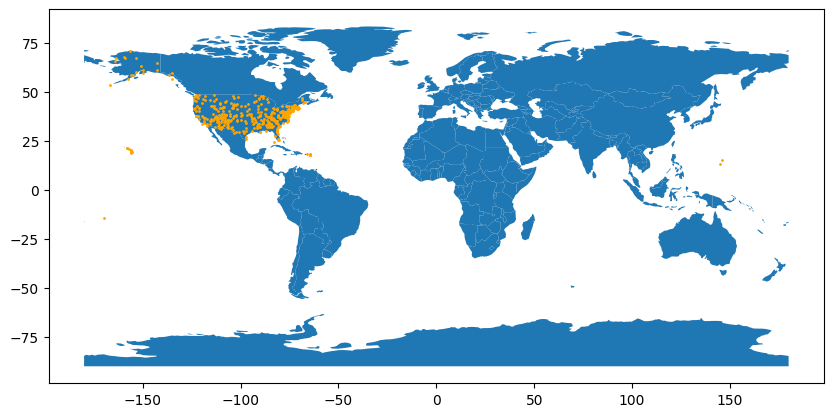

In [ ]:
geometry= [Point(xy) for xy in zip(df['longitude'],df['latitude'])]
gdf= GeoDataFrame(df,geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='orange', markersize=1);

In [ ]:
operating=[]
holidays=[]
for i in df['operating_hours']:
    if len(i)>0:
        operating.append(i[0]['standardHours'])
    if len(i)==0:
        operating.append(np.nan)
for i in df['operating_hours']:
    if len(i)>0 and len(i[0]['exceptions'])>0:
        holidays.append(list(set([i[0]['exceptions'][x]['name'] for x in range(len(i[0]['exceptions']))])))
    else:
        holidays.append(np.nan)
print(len(operating))
print(len(holidays))
df['standard_hours']=operating
df['holiday']=holidays
df.drop(columns='operating_hours', axis=1, inplace=True)

In [ ]:
for name in df['full_name']:
    print(name)

Abraham Lincoln Birthplace National Historical Park
Acadia National Park
Adams National Historical Park
African American Civil War Memorial
African Burial Ground National Monument
Agate Fossil Beds National Monument
Ala Kahakai National Historic Trail
Alagnak Wild River
Alaska Public Lands
Alcatraz Island
Aleutian Islands World War II National Historic Area
Alibates Flint Quarries National Monument
Allegheny Portage Railroad National Historic Site
Amache National Historic Site
American Memorial Park
Amistad National Recreation Area
Anacostia Park
Andersonville National Historic Site
Andrew Johnson National Historic Site
Aniakchak National Monument & Preserve
Antietam National Battlefield
Apostle Islands National Lakeshore
Appalachian National Scenic Trail
Appomattox Court House National Historical Park
Arches National Park
Arkansas Post National Memorial
Arlington House, The Robert E. Lee Memorial
Assateague Island National Seashore
Aztec Ruins National Monument
Badlands National Park


In [ ]:
s_list=[]
for i in range(len(df['states'])):
    if len(df['states'].iloc[i].split(','))>1:
        s=df['states'].iloc[i].split(',')

        s_list.append([j for j in s])
    else:
            s_list.append(df['states'].loc[i].split(',')[0])

for i in s_list:
    print(i)

KY
ME
MA
DC
NY
NE
HI
AK
AK
CA
AK
TX
PA
CO
MP
TX
DC
GA
TN
AK
MD
WI
['CT', 'GA', 'MA', 'MD', 'ME', 'NC', 'NH', 'NJ', 'NY', 'PA', 'TN', 'VA', 'VT', 'WV']
VA
UT
AR
VA
['MD', 'VA']
NM
SD
MD
NM
DC
CO
AK
TX
FL
MT
['KY', 'TN']
TX
['MT', 'WY']
AL
FL
CO
['RI', 'MA']
TX
['NC', 'VA']
WV
VA
MA
MA
MA
MS
KS
UT
VI
AR
['MO', 'AR', 'OK', 'TX', 'NM', 'AZ', 'CA']
CA
['CA', 'CO', 'ID', 'KS', 'MO', 'NE', 'NV', 'OR', 'UT', 'WY']
KY
FL
LA
AZ
UT
MA
NC
VA
AK
NC
DC
UT
['VA', 'MD', 'DE', 'DC', 'PA', 'NY']
NM
NC
NM
DC
AZ
FL
NY
CA
MD
UT
VA
NM
TX
CA
SC
OH
GA
['DC', 'MD', 'WV']
['DC', 'DE', 'MD', 'NY', 'PA', 'VA', 'WV']
['GA', 'TN']
OK
AZ
VI
ID
['DC', 'MD', 'VA']
MD
VA
CO
CT
SC
DC
AZ
SC
OR
ID
['KY', 'TN', 'VA']
GA
CO
OH
CA
OH
FL
['CA', 'NV']
['NJ', 'PA']
AK
CA
WY
['CO', 'UT']
FL
DC
WA
PA
IA
PA
['NM', 'TX']
['TX', 'LA']
NM
NM
NY
['NJ', 'NY']
['IL', 'MS']
CA
FL
NY
NY
OH
['DE', 'PA']
PA
CO
DC
AZ
TX
['KY', 'TN']
DC
MD
GA
WY
KS
FL
MD
VA
PA
CA
GA
NC
KS
['AR', 'OK']
NY
SC
NM
['MT', 'ND']
['OR', 'WA']
MD
WY
DC
DC
MA
VA
AL
PA

In [18]:
df['images'][470][0]['caption']

                   

{'credit': 'NPS/Shane Carte',
 'title': 'The Watchman',
 'altText': 'A triangular sandstone mountain overlooks green and yellow foliage. A cloudy blue sky is overhead.',
 'caption': 'The Watchman in Zion Canyon',
 'url': 'https://www.nps.gov/common/uploads/structured_data/68BFC1AC-BF96-629F-89D261D78F181C64.jpg'}